2027-07-18 Python - Portfolio Analysis - simple Monte Carlo Simulation

There are a lot of contributors on Linkedin and other platforms on how one can utilize programming languages such as Python for portfolio and risk management.   

I have come across this article below on using Pandas and NumPy for portfolio optimization and I will use. the Monte Carlo simulation portion.  The instruments selected are either: 1) securities that I am currently invested in and/or 2) securities that are on my watchlist.

Code reference: https://mishraayush447.medium.com/portfolio-optimization-using-python-b8d2b64e520e

These codes are run using Jupyter Lab/Jupyter Notebook.  As you will see, my computing enviornment is Windows and I have a number of drives setup in my system.  Please kindly see how Jupyter Lab can be run at any directory on Windows here

https://github.com/hgithub001/Python_Sample/blob/main/How%20to%20launch%20jupyter%20notebook%20from%20other%20drive.md

I will also upload this notebook to my Github: https://github.com/hgithub001 

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#check your current working directory
#os.getcwd()
#change working directory, if needed
#os.chdir()

Please note that csv files do not need to be saved at the same directory as this notebook.

My older notebook utilizes yfinance library to get data from Yahoo Finance.  However, it does not seem to work properly at my end at the time when this notebook was being written.  The price history data is taken from my personal trading application/brokerage service (Interactive Brokers' Trader Workstation).  Data preparation requirement varies among different data sources.  For example, pandas need clarification on how to decode the csv file's date column.

The time series used started from 2020-01-01 to 2025-07-17.  Some instruments may have shorter time range.   Return is first calculated on a daily basis and annualized as needed (assumed 252 days)

These instruments are as follow:

HK_2840 = SPDR Gold Trust

HK_3066 = CSOP Bitcoin Futures ETF

HK_3132 = Samsung Bloomberg Global Semiconductor ETF

HK_3135 = Samsung Bitcoin Futures Active ETF

BRK_B = Berkshire Hathaway Inc Class B

DBA = Invesco DB Agriculture Fund

GLTR = abrdn Physical Precious Metals Basket Shares ETF

INTC = Intel Corp

LVHI = Franklin Intl Low Volatility High Dividend Index

MITSY = Mitsui & Co., Ltd

NBIS = Nebius Group N.V

QQQ = Invesco QQQ Trust

VWO = Vanguard Emerging Markets Stock Index Fund ETF

YUM = Yum! Brands

ETH = Ethereum (ETH) to US Dollar (USD)

Since this notebook is completed within a day, codes are not intended to be optimized.  I will try to improve the data cleaning section next time.

In [3]:
#import data
HK_2840 = pd.read_csv("Q:/Data/Price_Time_Series/2840.csv")
HK_3066 = pd.read_csv("Q:/Data/Price_Time_Series/3066.csv")
HK_3132 = pd.read_csv("Q:/Data/Price_Time_Series/3132.csv")
HK_3135 = pd.read_csv("Q:/Data/Price_Time_Series/3135.csv")
BRK_B = pd.read_csv("Q:/Data/Price_Time_Series/BRK_B.csv")
DBA = pd.read_csv("Q:/Data/Price_Time_Series/DBA.csv")
GLTR = pd.read_csv("Q:/Data/Price_Time_Series/GLTR.csv")
INTC = pd.read_csv("Q:/Data/Price_Time_Series/INTC.csv")
LVHI = pd.read_csv("Q:/Data/Price_Time_Series/LVHI.csv")
MITSY = pd.read_csv("Q:/Data/Price_Time_Series/MITSY.csv")
NBIS = pd.read_csv("Q:/Data/Price_Time_Series/NBIS.csv")
QQQ = pd.read_csv("Q:/Data/Price_Time_Series/QQQ.csv")
VWO = pd.read_csv("Q:/Data/Price_Time_Series/VWO.csv")
YUM = pd.read_csv("Q:/Data/Price_Time_Series/YUM.csv")
ETH = pd.read_csv("Q:/Data/Price_Time_Series/ETH.csv")

In [4]:
HK_2840.head()

,Date,Open,High,Low,Close,Volume,Adjustment
0,07-18-25,2413.0,2421.0,2409.0,2420.0,8727.0,NaN
1,07-17-25,2418.0,2420.0,2405.0,2405.0,8467.0,NaN
2,07-16-25,2416.0,2416.0,2404.0,2413.0,16718.0,NaN
3,07-15-25,2430.0,2433.0,2418.0,2431.0,18689.0,NaN
4,07-14-25,2430.0,2439.0,2425.0,2437.0,24181.0,NaN


In [5]:
#change "Date" column datatype to datatime
HK_2840['Date']= pd.to_datetime(HK_2840['Date'], format='%m-%d-%y')
HK_3066['Date']= pd.to_datetime(HK_3066['Date'], format='%m-%d-%y')
HK_3132['Date']= pd.to_datetime(HK_3132['Date'], format='%m-%d-%y')
HK_3135['Date']= pd.to_datetime(HK_3135['Date'], format='%m-%d-%y')
BRK_B['Date']= pd.to_datetime(BRK_B['Date'], format='%m-%d-%y')
DBA['Date']= pd.to_datetime(DBA['Date'], format='%m-%d-%y')
GLTR['Date']= pd.to_datetime(GLTR['Date'], format='%m-%d-%y')
INTC['Date']= pd.to_datetime(INTC['Date'], format='%m-%d-%y')
LVHI['Date']= pd.to_datetime(LVHI['Date'], format='%m-%d-%y')
MITSY['Date']= pd.to_datetime(MITSY['Date'], format='%m-%d-%y')
NBIS['Date']= pd.to_datetime(NBIS['Date'], format='%m-%d-%y')
QQQ['Date']= pd.to_datetime(QQQ['Date'], format='%m-%d-%y')
VWO['Date']= pd.to_datetime(VWO['Date'], format='%m-%d-%y')
YUM['Date']= pd.to_datetime(YUM['Date'], format='%m-%d-%y')
ETH['Date']= pd.to_datetime(ETH['Date'], format='%m-%d-%y')

In [6]:
#set each series index to its "Date" for combining the series to dataframe
HK_2840.set_index("Date", inplace = True)
HK_3066.set_index("Date", inplace = True)
HK_3132.set_index("Date", inplace = True)
HK_3135.set_index("Date", inplace = True)
BRK_B.set_index("Date", inplace = True)
DBA.set_index("Date", inplace = True)
GLTR.set_index("Date", inplace = True)
INTC.set_index("Date", inplace = True)
LVHI.set_index("Date", inplace = True)
MITSY.set_index("Date", inplace = True)
NBIS.set_index("Date", inplace = True)
QQQ.set_index("Date", inplace = True)
VWO.set_index("Date", inplace = True)
YUM.set_index("Date", inplace = True)
ETH.set_index("Date", inplace = True)

For the purpose of this analysis, closing price is selected.

In [7]:
#selecting "Close" data column
HK_2840 = HK_2840['Close']
HK_3066 = HK_3066['Close']
HK_3132 = HK_3132['Close']
HK_3135 = HK_3135['Close']
BRK_B = BRK_B['Close']
DBA = DBA['Close']
GLTR = GLTR['Close']
INTC = INTC['Close']
LVHI = LVHI['Close']
MITSY = MITSY['Close']
NBIS = NBIS['Close']
QQQ = QQQ['Close']
VWO = VWO['Close']
YUM = YUM['Close']
ETH = ETH['Close']

In [8]:
#rename the "Close" column to the instrument name.  These names will become the dataframe's column header
HK_2840.name = "HK_2840"
HK_3066.name = "HK_3066"
HK_3132.name = "HK_3132"
HK_3135.name = "HK_3135"
BRK_B.name = "BRK_B"
DBA.name = "DBA"
GLTR.name = "GLTR"
INTC.name = "INTC"
LVHI.name = "LVHI"
MITSY.name = "MITSY"
NBIS.name = "NBIS"
QQQ.name = "QQQ"
VWO.name = "VWO"
YUM.name = "YUM"
ETH.name = "ETH"

In [9]:
HK_2840.head()

Date
2025-07-18    2420.0
2025-07-17    2405.0
2025-07-16    2413.0
2025-07-15    2431.0
2025-07-14    2437.0
Name: HK_2840, dtype: float64

Since not every instrument has price history going as far as 2020, the return calculation will start from the begining of 2024.

In [10]:
price_data = pd.concat([HK_2840, HK_3066, HK_3132, HK_3135, BRK_B, DBA,
                       GLTR, INTC, LVHI, MITSY, NBIS, QQQ, VWO, YUM, ETH], axis=1)
price_data = price_data.loc[price_data.index > '2024-01-01']
price_data.head()

,HK_2840,HK_3066,HK_3132,HK_3135,BRK_B,DBA,GLTR,INTC,LVHI,MITSY,NBIS,QQQ,VWO,YUM,ETH
Date,,,,,,,,,,,,,,,
2024-01-02,1500.0,18.84,17.89,18.34,362.46,20.69,90.61,47.80,27.74,369.31,18.94,402.59,40.62,129.03,2360.8
2024-01-03,1494.0,18.40,17.23,17.91,366.75,20.59,89.37,47.05,27.64,371.00,18.94,398.33,40.50,129.10,2219.4
2024-01-04,1481.6,17.47,16.97,16.99,363.68,20.72,89.24,46.87,27.77,375.03,18.94,396.28,40.43,128.69,2277.5
2024-01-05,1479.6,17.85,16.92,17.35,365.59,20.58,89.39,46.89,27.86,377.36,18.94,396.75,40.49,128.34,2241.3
2024-01-08,1470.6,17.83,17.06,17.37,368.18,20.51,88.65,48.45,28.03,382.80,18.94,404.95,40.56,128.64,2337.9


In [11]:
#calculate daily return
price_return = price_data.pct_change(fill_method=None).dropna()
price_return.head()

,HK_2840,HK_3066,HK_3132,HK_3135,BRK_B,DBA,GLTR,INTC,LVHI,MITSY,NBIS,QQQ,VWO,YUM,ETH
Date,,,,,,,,,,,,,,,
2024-01-03,-0.004000,-0.023355,-0.036892,-0.023446,0.011836,-0.004833,-0.013685,-0.015690,-0.003605,0.004576,0.0,-0.010581,-0.002954,0.000543,-0.059895
2024-01-04,-0.008300,-0.050543,-0.015090,-0.051368,-0.008371,0.006314,-0.001455,-0.003826,0.004703,0.010863,0.0,-0.005146,-0.001728,-0.003176,0.026178
2024-01-05,-0.001350,0.021752,-0.002946,0.021189,0.005252,-0.006757,0.001681,0.000427,0.003241,0.006213,0.0,0.001186,0.001484,-0.002720,-0.015895
2024-01-08,-0.006083,-0.001120,0.008274,0.001153,0.007084,-0.003401,-0.008278,0.033269,0.006102,0.014416,0.0,0.020668,0.001729,0.002338,0.043100
2024-01-09,0.002720,0.070667,0.024619,0.070236,-0.003477,0.006826,-0.003271,-0.008256,-0.007849,-0.021552,0.0,0.001976,-0.011588,-0.003265,-0.037042


In [12]:
#calculate annualized mean
price_return.mean()*252

HK_2840    0.295428
HK_3066    0.911904
HK_3132    0.549573
HK_3135    0.916729
BRK_B      0.326737
DBA        0.272938
GLTR       0.195114
INTC      -0.316061
LVHI       0.158875
MITSY      0.061050
NBIS       0.888311
QQQ        0.311908
VWO        0.191612
YUM        0.267648
ETH        0.669243
dtype: float64

In [13]:
#calculate annualized standard deivation
price_return.std()*252

HK_2840     2.472826
HK_3066     8.395074
HK_3132     5.855464
HK_3135     8.252789
BRK_B       2.580342
DBA         2.543867
GLTR        2.895598
INTC        9.007169
LVHI        1.752651
MITSY       4.844727
NBIS       13.213260
QQQ         3.533641
VWO         2.494713
YUM         2.939793
ETH        11.044186
dtype: float64

In [14]:
#calculate annualized covariance matrix.  This is required to calculate portfolio volatility/sd
price_return.cov()*252

,HK_2840,HK_3066,HK_3132,HK_3135,BRK_B,DBA,GLTR,INTC,LVHI,MITSY,NBIS,QQQ,VWO,YUM,ETH
HK_2840,0.024265,0.007426,0.002787,0.007409,0.000483,0.000998,0.007762,-0.001668,0.000088,0.003867,0.001416,-0.001677,0.001098,0.001096,-0.000355
HK_3066,0.007426,0.279672,0.078017,0.272551,0.009877,0.001700,0.006862,0.009631,0.002442,0.005628,0.024348,0.011306,0.005803,-0.006336,0.075915
HK_3132,0.002787,0.078017,0.136057,0.077977,0.000050,-0.000870,0.003774,0.013144,-0.002289,0.004444,0.021790,0.010551,0.007870,-0.000223,0.019946
HK_3135,0.007409,0.272551,0.077977,0.270272,0.010169,0.001593,0.007187,0.008975,0.002497,0.006755,0.024005,0.011566,0.006643,-0.005687,0.078768
BRK_B,0.000483,0.009877,0.000050,0.010169,0.026421,0.000294,0.001037,0.029556,0.008970,0.016049,-0.001773,0.011998,0.005832,0.007717,0.024622
DBA,0.000998,0.001700,-0.000870,0.001593,0.000294,0.025680,0.004165,0.005658,0.002855,0.003819,0.017934,0.005201,0.003575,-0.000510,0.010469
GLTR,0.007762,0.006862,0.003774,0.007187,0.001037,0.004165,0.033272,0.011721,0.005288,0.013554,0.010917,0.008136,0.012134,0.002753,0.020472
INTC,-0.001668,0.009631,0.013144,0.008975,0.029556,0.005658,0.011721,0.321941,0.024563,0.065994,0.071885,0.064308,0.033278,0.017316,0.126047
LVHI,0.000088,0.002442,-0.002289,0.002497,0.008970,0.002855,0.005288,0.024563,0.012190,0.020040,0.012339,0.013092,0.009991,0.006053,0.018885
MITSY,0.003867,0.005628,0.004444,0.006755,0.016049,0.003819,0.013554,0.065994,0.020040,0.093140,0.051029,0.031226,0.021741,0.008416,0.053861


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

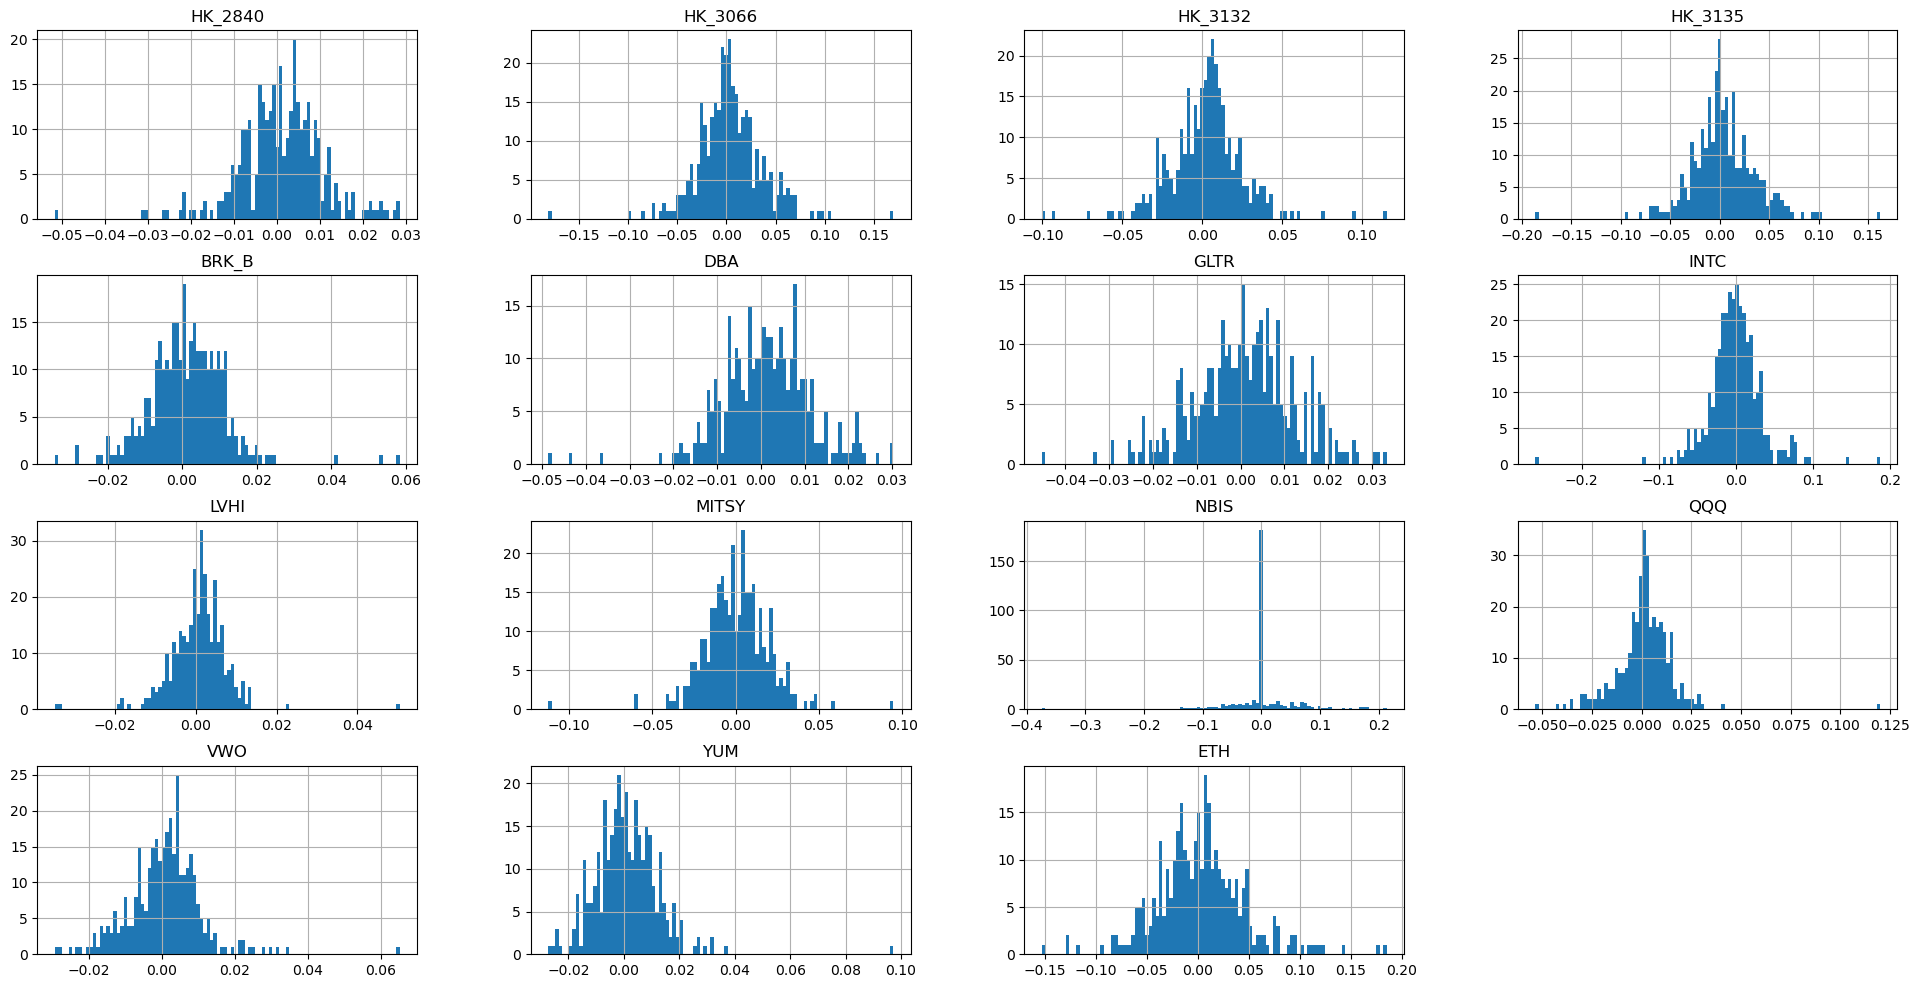

In [15]:
price_return.hist(figsize = (24,12), bins=100)
plt.tight_layout

These 15 mini histograms show the daily return of the 15 selected instruments.  While majority of them seem to have normal like distribution.  There are some that have skewed distribution (more occurence of positive/negative returns) and some have relatively extreme outliners.

Monte Carlo Simulation

The number of simulated portfolio is set to 100,000.   Risk free rate is assumed to be close to US Treasury 10-Y Bond yield.

The objective of the optimization is to maximize the Sharpe ratio of a portfolio.  The Sharpe Ratio is defined as:

(Portfolio Return - Risk Free Rate)/(Portfolio volatility)

In this exercise, we will annualize return and volatility (standard deviation).

In [16]:
n = 100000
count_asset = 15
rate_free = 0.0444 #2025-07-18 UST 10Y yield is around 4.44%.  It is used as a proxy
simulated_weights = np.zeros((n, count_asset))
simulated_returns = np.zeros(n)
simulated_std = np.zeros(n)
simulated_sharpe = np.zeros(n)

for i in range(n):
    weights = np.array(np.random.random(count_asset))
    weights = weights/np.sum(weights)
    simulated_weights[i,:] = weights
    simulated_returns[i] = np.sum(price_return.mean()*252*weights)
    simulated_std[i] = np.sqrt(np.dot(weights.T, np.dot(price_return.cov()*252,weights)))
    simulated_sharpe[i] = (simulated_returns[i]-rate_free)/simulated_std[i]

In [17]:
simulated_sharpe.max()

2.776348825041727

In [18]:
simulated_sharpe.argmax()

91339

In [19]:
simulated_weights[simulated_sharpe.argmax(), :]

array([0.12259659, 0.04439034, 0.08835846, 0.07151428, 0.13338611,
       0.09993618, 0.05247288, 0.01436513, 0.11008645, 0.00925981,
       0.02715968, 0.03743437, 0.0334263 , 0.13459739, 0.02101602])

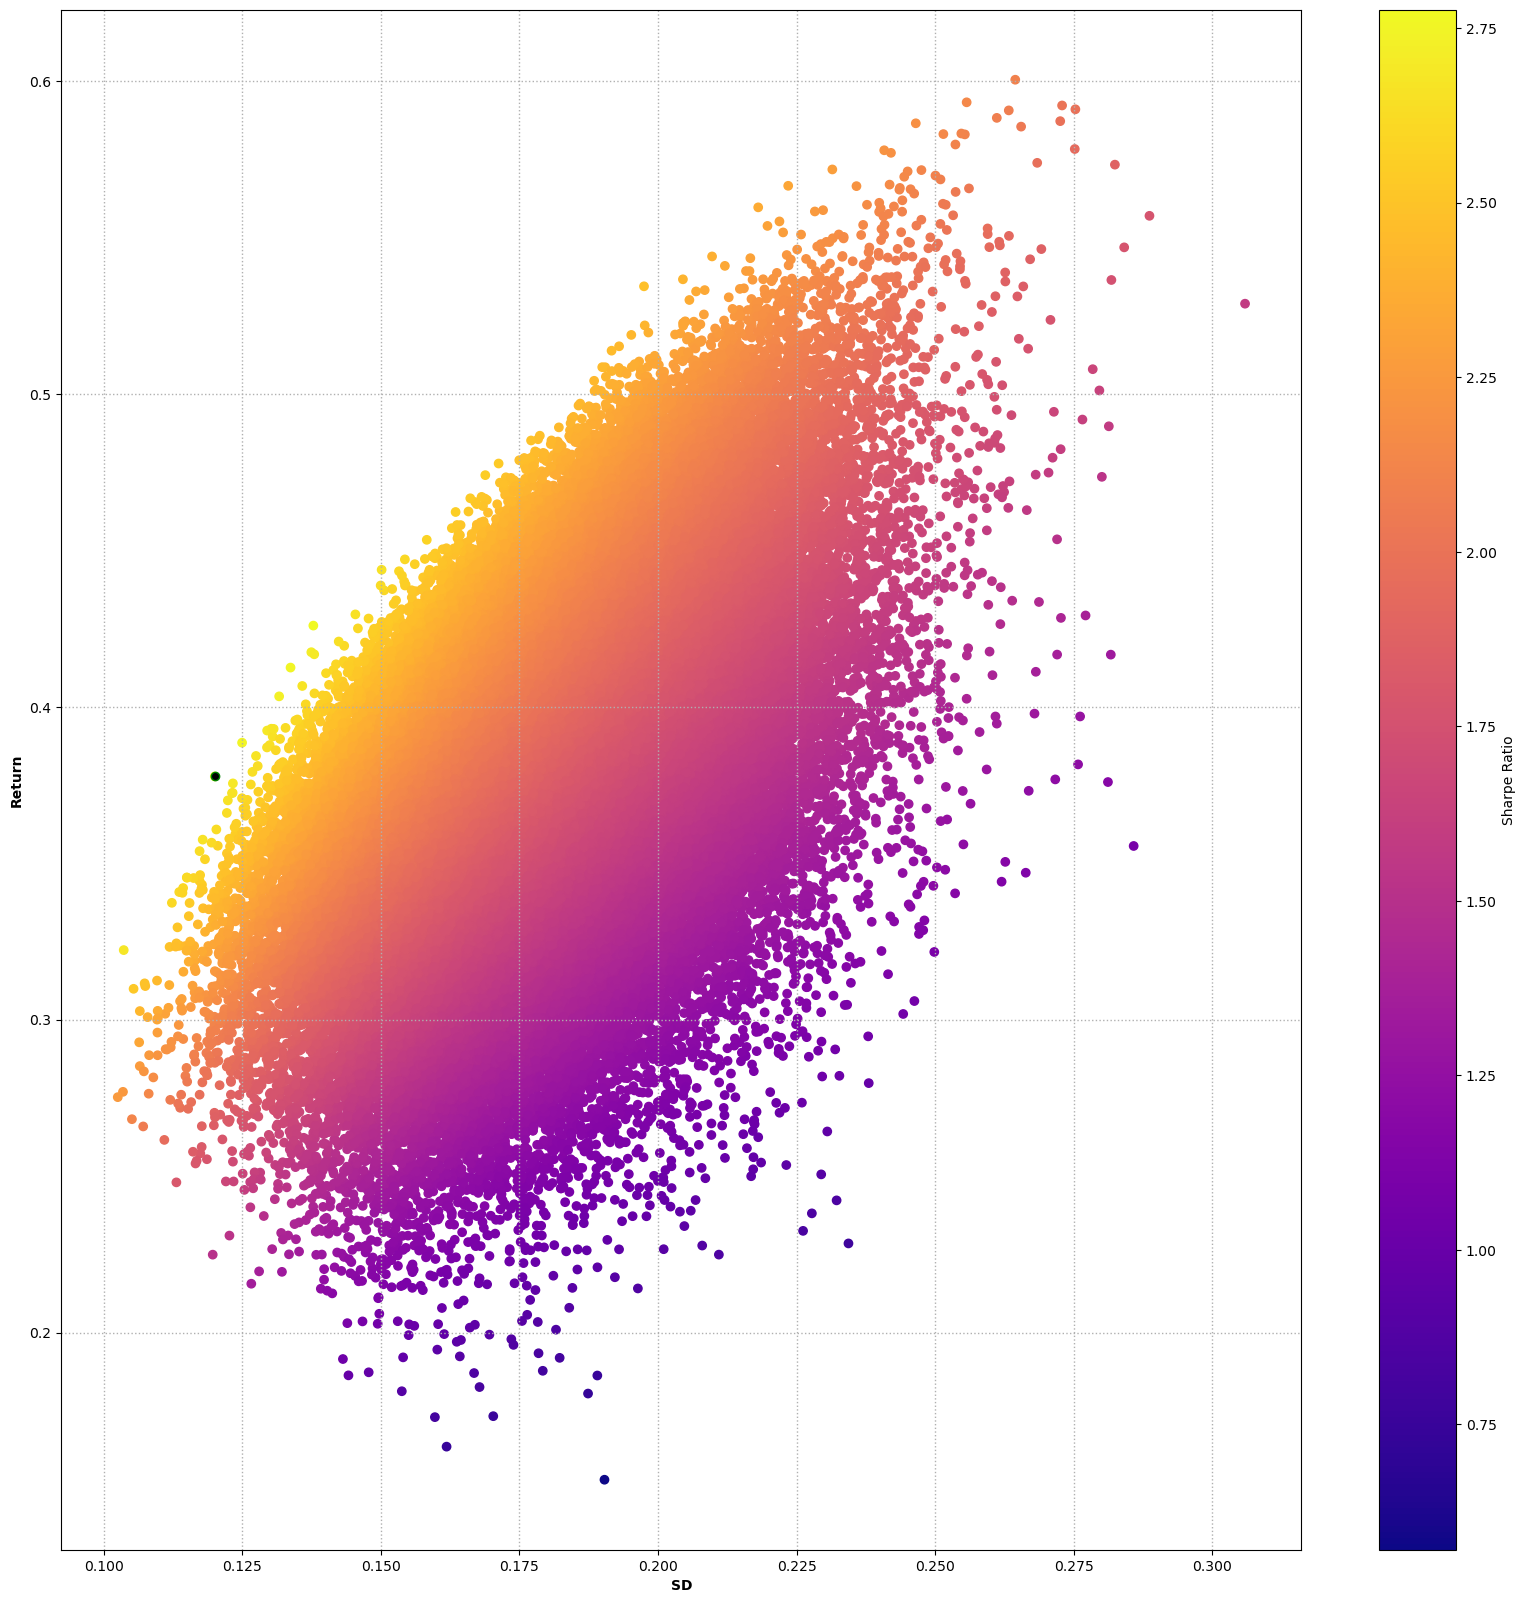

In [20]:
plt.figure(figsize = (20,20))
plt.scatter(simulated_std, simulated_returns, c=simulated_sharpe, cmap="plasma")
plt.colorbar(label = "Sharpe Ratio")
plt.xlabel("SD", fontweight = 'bold')
plt.ylabel("Return", fontweight = 'bold')

plt.scatter(simulated_std[simulated_sharpe.argmax()], simulated_returns[simulated_sharpe.argmax()], 
            c = 'black', edgecolors='green')
plt.grid(True, ls=':', lw=1)

The optimized portfolio is recommended to have the following weights:

HK_2840 SPDR Gold Trust = 0.12259659

HK_3066 CSOP Bitcoin Futures ETF = 0.04439034

HK_3132 Samsung Bloomberg Global Semiconductor ETF = 0.08835846

HK_3135 Samsung Bitcoin Futures Active ETF = 0.07151428

BRK_B Berkshire Hathaway Inc Class B = 0.13338611

DBA Invesco DB Agriculture Fund = 0.09993618

GLTR abrdn Physical Precious Metals Basket Shares ETF = 0.05247288

INTC Intel Corp = 0.01436513

LVHI Franklin Intl Low Volatility High Dividend Index = 0.11008645

MITSY Mitsui & Co., Ltd = 0.00925981

NBIS Nebius Group N.V = 0.02715968

QQQ Invesco QQQ Trust = 0.03743437

VWO Vanguard Emerging Markets Stock Index Fund ETF = 0.0334263

YUM Yum! Brands = 0.13459739

ETH Ethereum (ETH) to US Dollar (USD) = 0.02101602


About 17.5% of the portfolio will be exposed to precious metal commodities.

Berkshire Hathaway Class B and Yum Brand have target weights of 13% each.

Ethereum has a target of 2% while the two Bitcoin future ETFs are at 4.4% and 7.2%.  This is likely because Ethereum has not experienced gains as large as Bitcoins in the past 2 years.